In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.notebook_repr_html', False)

# 부재 정보를 포함해서 살펴보자|
df_ratio = pd.read_csv('stacked_ratio.csv', encoding="CP949")
df_ratio.head()

  deviceId    부재  미활동    활동   주의  낙상
0      #01  2793  843   664   20   0
1      #02  3906  175   236    3   0
2      #03  2827  275  1042  174   2
3      #04  1046  613  2647   14   0
4      #05  1046  650  2606   17   1

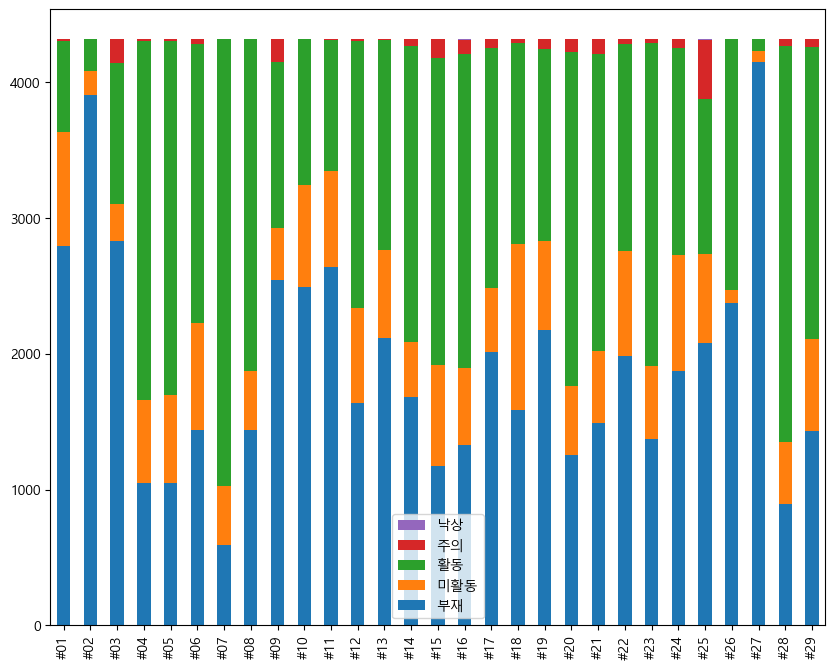

In [80]:
# plt.style.use('grayscale')
# plt.style.use('classic')
plt.rc('font', family='Malgun Gothic')

plt.rcParams['figure.figsize'] = [10, 8]
ax = df_ratio.plot.bar(stacked=True)
ax.set_xticklabels(df_ratio['deviceId'])

handles, labels = ax.get_legend_handles_labels()
# reverse both handles and labels
ax.legend(reversed(handles), reversed(labels), loc='best')

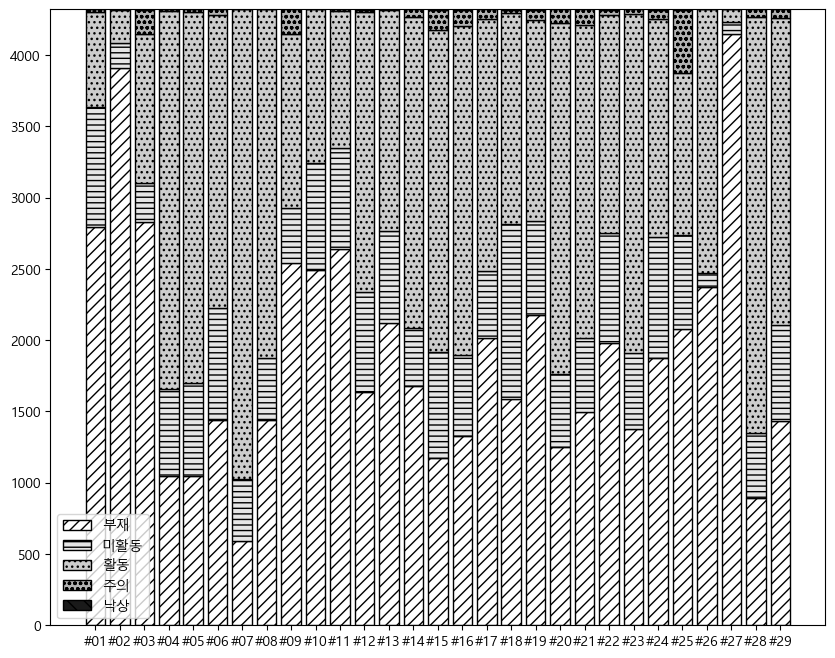

In [81]:
plt.style.use('default')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

deviceId = df_ratio['deviceId']
fall = df_ratio['낙상']
caution = df_ratio['주의']
action = df_ratio['활동']
non_action = df_ratio['미활동']
absent = df_ratio['부재']

plt.bar(deviceId, absent, edgecolor='black', color='w',
        hatch="///", label='부재')
plt.bar(deviceId, non_action, bottom=absent, edgecolor='black',
        color='0.9', hatch="---", label='미활동')
plt.bar(deviceId, action, bottom=absent+non_action,
        edgecolor='black', color='0.8', hatch="...", label='활동')
plt.bar(deviceId, caution, bottom=absent+non_action+action,
        edgecolor='black', color='0.7', hatch="ooo", label='주의')
plt.bar(deviceId, fall, bottom=absent+non_action+action+caution,
        edgecolor='black', color='0.1', hatch='\\\\', label='낙상')

plt.legend(loc='best')
plt.show()

## 부재는 0으로 처리하여 가시화해보기

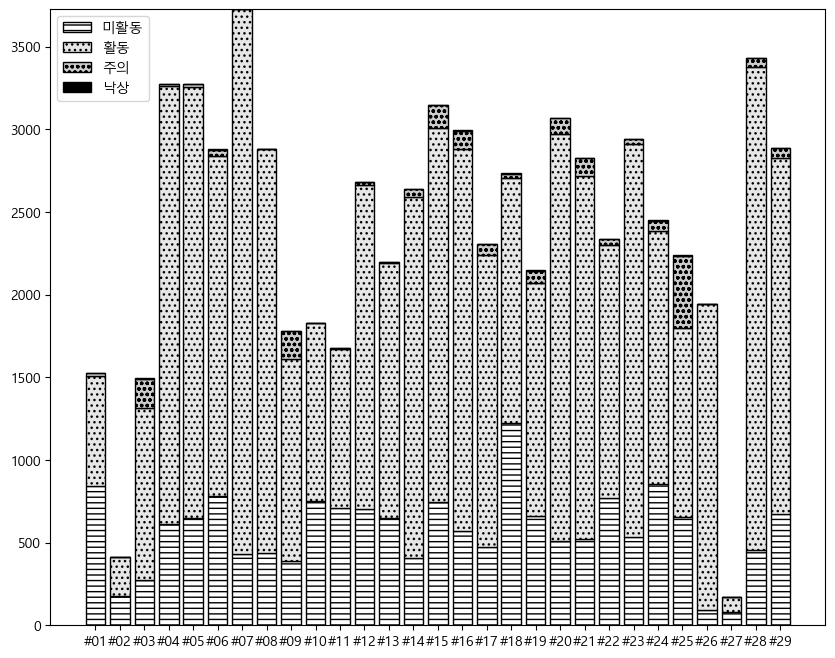

In [85]:
plt.style.use('default')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]


# 부재정보를 뺀 누적바 그래프를 그려보자
df_not_absence = pd.read_csv('stacked_not_absence.csv', encoding="CP949")

deviceId = df_not_absence['deviceId']
fall = df_not_absence['낙상']
caution = df_not_absence['주의']
action = df_not_absence['활동']
non_action = df_not_absence['미활동']

plt.bar(deviceId, non_action, edgecolor='black',
        color='w', hatch="---", label='미활동')
plt.bar(deviceId, action, bottom=non_action,
        edgecolor='black', color='0.9', hatch="...", label='활동')
plt.bar(deviceId, caution, bottom=non_action+action,
        edgecolor='black', color='0.8', hatch="ooo", label='주의')
plt.bar(deviceId, fall, bottom=non_action+action+caution,
        edgecolor='black', color='0', hatch='\\\\', label='낙상')

plt.legend(loc='best')
plt.show()